In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [2]:
data=DataFrame([[62,60,63,59],[63,67,71,64,65,66],[68,66,71,67,68,68],[56,62,60,61,63,64,63,59]]).T
Parameter=[u"$\theta_1$",u"$\theta2$",u"$\theta_3$",u"$\theta_4$",u"$\mu$",u"$\sigma$",u"$\tau$"]

In [3]:
Crude_initial_parameter_estimates=[np.mean(data[0]),np.mean(data[1]),np.mean(data[2]),np.mean(data[3]),
                                   np.mean(np.mean(data)),np.sqrt(np.mean(np.var(data,ddof=1))),np.sqrt(np.var(np.mean(data),ddof=1))]

In [4]:
Crude_initial_parameter_estimates

[61.0, 66.0, 68.0, 61.0, 64.0, 2.2907682221514789, 3.5590260840104371]

In [52]:
def log_p(y_ij,theta_j,mu,sigma,tau):
    J=len(y_ij.T)
    n=0
    for i in range(J):
        n=n+len(y_ij.ix[:,i].dropna())
    return -n*np.log(sigma)-(J-1)*np.log(tau)-1./(2*tau**2)*np.sum((theta_j-mu)**2)-1./(2*sigma**2)*np.sum(np.sum((y_ij-theta_j)**2))

def theta_j_hat(y_ij,mu,sigma,tau):
    n_j=[]
    for i in range(len(y_ij.T)):
        n_j.append(len(y_ij.ix[:,i].dropna()))
    n_j=np.array(n_j)
    return 1.*(sigma**2*mu+tau**2*n_j*np.mean(y_ij))/(sigma**2+n_j*tau**2)

def V_theta_j(y_ij,sigma,tau):
    n_j=[]
    for i in range(len(y_ij.T)):
        n_j.append(len(y_ij.ix[:,i].dropna()))
    n_j=np.array(n_j)
    return 1.*(tau**2*sigma**2)/(sigma**2+n_j*tau**2)

def E_log_p(y_ij,theta_j,mu,sigma,tau):
    J=len(y_ij.T)
    n=0
    for i in range(J):
        n=n+len(y_ij.ix[:,i].dropna())
    theta_j_hat=1.*(sigma**2*mu+tau**2*n*np.mean(y_ij))/(sigma**2+n*tau**2)
    V_theta_j=1.*(tau**2*sigma**2)/(sigma**2+n*tau**2)
    return -n*np.log(sigma)-(J-1)*np.log(tau)-1./(2*tau**2)*((theta_j_hat-mu)**2+V_theta_j)-1./(2*sigma**2)*((theta_j_hat-mu)**2+V_theta_j)


def EM(y_ij,ite):
    J=len(y_ij.T)
    n=0
    for i in range(J):
        n=n+len(y_ij.ix[:,i].dropna())
    mu=[0]
    sigma=[1]
    tau=[1]
    theta_j=[]
    log_posterior_dens=[]
    for i in range(ite):
        mu_new=1.*np.sum(theta_j_hat(y_ij,mu[i],sigma[i],tau[i]))/J
        sigma_new=np.sqrt(1.*np.sum(np.sum((y_ij-theta_j_hat(y_ij,mu[i],sigma[i],tau[i]))**2+V_theta_j(y_ij,sigma[i],tau[i])))/n)
        tau_new=np.sqrt(1.*np.sum((theta_j_hat(y_ij,mu[i],sigma[i],tau[i])-mu_new)**2+V_theta_j(y_ij,sigma[i],tau[i]))/(J-1))
        log_posterior_dens.append(log_p(y_ij,theta_j_hat(y_ij,mu_new,sigma_new,tau_new),mu_new,sigma_new,tau_new))
        mu.append(mu_new)
        sigma.append(sigma_new)
        tau.append(tau_new)
        theta_j.append(theta_j_hat(y_ij,mu_new,sigma_new,tau_new))
    return np.array([theta_j,mu,sigma,tau,log_posterior_dens])
        
        
        

In [90]:
result=EM(data,100)

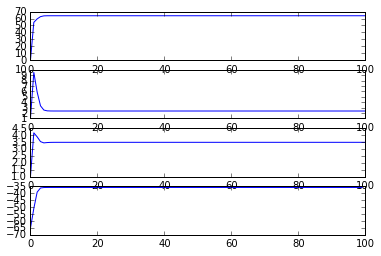

In [92]:
plt.subplot(411)
plt.plot(result[1])

plt.subplot(412)
plt.plot(result[2])

plt.subplot(413)
plt.plot(result[3])

plt.subplot(414)
plt.plot(result[4])

In [93]:
First_estimate=[result[0][0][0],result[0][0][1],result[0][0][2],result[0][0][3],result[1][1],result[2][1],result[3][1]]
Second_estimate=[result[0][1][0],result[0][1][1],result[0][1][2],result[0][1][3],result[1][2],result[2][2],result[3][2]]
Third_estimate=[result[0][2][0],result[0][2][1],result[0][2][2],result[0][2][3],result[1][3],result[2][3],result[3][3]]
One_hundred_estimate=[result[0][99][0],result[0][99][1],result[0][99][2],result[0][99][3],result[1][100],result[2][100],result[3][100]]

In [96]:
Table13_1=DataFrame([Crude_initial_parameter_estimates,First_estimate,Second_estimate,Third_estimate,One_hundred_estimate],
                    index=["Crude estimate","First iteration","Second iteration","Third iteration","One hundred iteration"],
                   columns=[u"$\theta_1$",u"$\theta_2$",u"$\theta_3$",u"$\theta_4$",u"$\mu$",u"$\sigma$",u"$\tau$"]).T

In [97]:
Table13_1

,Crude estimate,First iteration,Second iteration,Third iteration,One hundred iteration
$\theta_1$,61.000000,57.291497,60.452293,61.317058,61.312442
$\theta_2$,66.000000,60.615325,64.198856,65.578453,65.857633
$\theta_3$,68.000000,61.681309,65.644688,67.319818,67.714385
$\theta_4$,61.000000,58.410437,60.665000,61.174418,61.164766
$\mu$,64.000000,54.469841,59.499642,62.740209,64.012306
$\sigma$,2.290768,9.525976,5.862606,3.323278,2.361529
$\tau$,3.559026,4.154628,3.865925,3.520406,3.470962


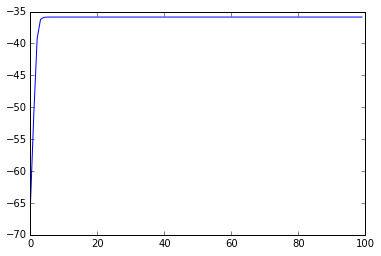

In [99]:
plt.plot(result[4])